<a href="https://colab.research.google.com/github/2003Yash/lstm-stock-pred/blob/main/Stock_Market_Analysis_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3070, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2863, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3061, in _parsed_pkg_info
    return self._pkg_info
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2863, in __getattr__
    raise AttributeError(attr)
AttributeError: _pkg_info. Did you mean: 'egg_info'?

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [ ]:
# Download historical data for Apple Inc. (AAPL)
ticker = "AAPL"
data = yf.download(ticker, start="2010-01-01", end="2024-01-01")

[*********************100%%**********************]  1 of 1 completed


In [ ]:
# Use the 'Close' column for prediction
df = data[['Close']]

# Convert the data to numpy array and scale
scaler = MinMaxScaler(feature_range=(0, 1)) # This transforms all the stock price data to be within the range [0, 1], making it more suitable for LSTM training.
scaled_data = scaler.fit_transform(df) # scaler means minmaxscaler

# Define the training data length (80% of the dataset)
training_data_len = int(np.ceil(len(scaled_data) * 0.8)) #rounds up floating point element(s) in an array to the nearest integer greater than or equal to the array element.

# Split the data into training and testing datasets
train_data = scaled_data[0:training_data_len, :]
test_data = scaled_data[training_data_len - 60:, :]

In [ ]:
# Create the training data
x_train, y_train = [], [] #These are two empty lists

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0]) # takes 60 previous values to predict 1 value
    y_train.append(train_data[i, 0])

# Convert the training data to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data (LSTM requires 3D input: number of samples, time steps, number of features)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Create the testing data
x_test, y_test = [], df[training_data_len:].values

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the testing data to numpy arrays
x_test = np.array(x_test)

# Reshape the data for the LSTM model
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
# Build the LSTM model
model = Sequential()

# First LSTM layer
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

# Second LSTM layer
model.add(LSTM(units=50, return_sequences=False)) # the LSTM layer outputs the hidden state for only the last time step. This reduces the output to a 2D array of shape
model.add(Dropout(0.2))

# we can add more lstm layers but make sure all except last lstm was having return_sequences as false rest as true and each lstm has 50 nodes

# Output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Print the model summary
model.summary()

#lstm to time series analysis by performing regression

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
model.fit(x_train, y_train, batch_size=32, epochs=100) #change batch size to 32 for optimization

Epoch 1/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0069
Epoch 2/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 5.6250e-04
Epoch 3/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.0272e-04
Epoch 4/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.7788e-04
Epoch 5/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.9406e-04
Epoch 6/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.2336e-04
Epoch 7/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.4214e-04
Epoch 8/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.9625e-04
Epoch 9/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.8309e-04
Epoch 10/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.8375e-04
Epoch 11/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.3516e-04
Epoch 12/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 2.5180e-04
Epoch 13/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.0913e-04
Epoch 14/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.0981e-04
Epoch 15/100
87/

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


<ipython-input-9-1e7129f622da>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


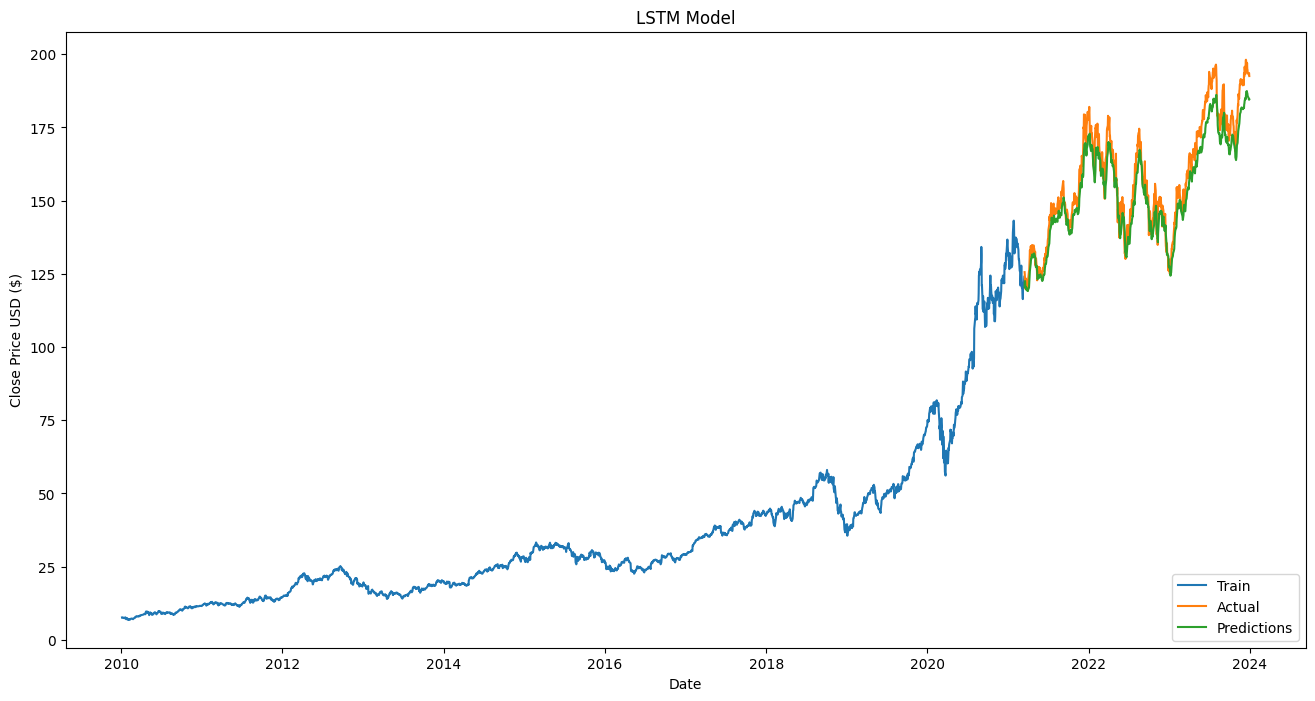

In [ ]:
# Get the model's predicted values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)  #the model outputs scaled values. To convert these back to the original stock price scale

# Plot the results
train = df[:training_data_len]
valid = df[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16, 8))
plt.title('LSTM Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Actual', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
# Calculate root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test) ** 2) #rmse score calculated from scratch using formula
print(f"RMSE: {rmse}") # low rmse is better, it just tells how near the actual points to predicted line

RMSE: 4.7376026998866685
